<a href="https://colab.research.google.com/github/Matt594/Intro-to-Deep-Learning/blob/master/MNIST_Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpretting a Recurrent Neural Network**

This notebook is a breakdown of recurrent neural networks with Keras. The goal of this notebook is to provide a compact reference for those with an entirely fresh background to computer science and/or machine learning. This is also just one out of three notebooks; the other two notebooks tackle multi-layer perceptrons (which I recommend viewing first) and convolutional neural networks.

A recurrent neural network is a deep learning structure commonly used to predict trends in data where the sequence of information is important for it's interpretation like texts, videos, and stocks. When data is fed into a recurrent neural network, it produces an output that is fed back into the neural network with new input. This lets the network directly evaluate new data based off of past experiences and discover patterns. Thus, recurrent neural networks are incredible tools for predicting stock trends, speech recognition, and translating languages. It's also amusing to let recurrent neural networks write their own stories and compose their own music with their predictive power. The recurrent neural network in this notebook will focus on natural language processing which means the network will analyze textual information. More specifically, our network will classify movie reviews as either positive or negative.

In each cell, I will attempt to provide a grounds-up explanation of the cell's contents, so the cell explanations may stray from machine learning concepts time to time and repeat content provided by the two other notebooks. Again, the goal of this notebook is to provide a reference for anyone to understand while remaining compact. If there's a topic you'd like to look into more, I've provided some extra sources of information in each cell.

Description of code cells should include:
1. Title: What topic(s) are being covered in the cell
2. Purpose: Goal of the cell
3. Execution: What the code is doing
4. Vocabulary/Concepts: Terminology and concepts for computer science of machine learning
5. General: Common principle/practice regarding cell operations and code
6. Interpretating Code: A guide to deciphering the cell's code
7. External Information: Sources for more information





In [0]:
#Import necessary libraries
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import backend as K
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

import os

# **Import Statements**

This first cell imports modules to make the coding process simpler. With pre-made modules, the programmer doesn't have to reinvent the wheel. They can spend more time creating an applicable program and less time creating a modular foundation.

**Vocabulary/Concepts**
*   Importing...Makes data accessible from another module
*   Module.......Collection of pre-made methods, classes, or programs

**Execution**

When a program calls for an import, the program searches for a module of the requested name on a system path.Though, before importing, modules must be downloaded or created so they have an address on the machine where the program is running. Once again, these are crucial because they'll save us time when creating our network; we won't need to create one from scratch.

**General** 
*   When importing, distinguish what modules must be used. No program needs to know every module on your machine.
*   Chunk imports together that are related to each other.
*   When importing created modules, like classes, it's best to keep all of the program's modules in one file so you don't need to change the system path.
*   Not every module is supported over multiple programming languages.
*   If you're having trouble with a particular task, look up modules for your programming language—you may find something incredibly useful to import.

**Interpretting Code**
*   "import" calls for modules to import
*   "from" specifies what should be imported from a module rather than importing the entire module
*   "as" changes how the module is called when it's used in the program
*   "keras" is a machine learning module for python that simplifies Google's Tensorflow
*   "numpy" is an array manipulation module for python
*   "matplotlib" is a data plotting module
*   "os" is a python module for your machine's operating system

**External Information**
*   [Python Import System](https://docs.python.org/3/reference/import.html)
*   [Keras Documentation](https://keras.io)
*   [Numpy Documentation](http://www.numpy.org)
*   [Matplotlib Documentation](https://matplotlib.org)
*   [Python Documentation](https://www.python.org)

These sources are great for interpretting what modules are being used in this notebook. If there is any uncertainty as to what operation is being done, it never hurts to look up the operation at the documentation's source.







In [0]:
#Suppress Warnings (Optional)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

# **Variable Initialization & Environmental Variables**

This cell suppresses warnings and disables debugging logs from Tensorflow. This is mostly just for preference since the program can operate without this line of code, but it makes the program notifications less annoying.

**Vocabulary/Concepts**
*   Variable Initialization.......Assigns a value to a variable
  *   Variable............................Stores data under a name and type
  *   Data..................................Information
  *   Data type..........................Form data takes to represent itself which includes integers, floats, strings, etc.
*   Environmental Variable...A value that affects running process behavior

**Execution**

Variable initilization sets one variable equal to a value. In this case, an environmental variable is being set to the value "2" which will be relayed to Tensorflow in order to prevent debugging and warnings from being displayed. Again, this statement was included as a preference since the notifications can be distracting, but the network can operate without suppressing Tensorflow's warnings.

**General**
*   Environmental variables can alter the way your program runs so it is important to be aware of how each variable affects the program when coding. 
*   Variable initialization is a basic computer science operation. It is crucial in almost every program. 

**Interpretting Code**
*   "os" refers to the python operating system module
*   "environ['TF_CPP_MIN_LOG_LEVEL']" specifies the environmental variable being changed
*   "=" is an operator where the variable on the left side is set equal to the value on the right
*   "2" is the value that the environmental variable is set to which is one of the modes for tensorflow logging

**External Information**
*   [Python Operators](https://www.tutorialspoint.com/python/python_basic_operators.htm)
*   [Variable Intialization](https://stackoverflow.com/questions/23345554/the-differences-between-initialize-define-declare-a-variable)
*   [Environmental Variables](https://en.wikipedia.org/wiki/Environment_variable)
*   [Operating System Documentation](https://docs.python.org/2/library/os.html)










In [0]:
#Set Variables
epochs = 3
batch_size = 64

# **More Variable Initialization & ML Variables**

This cell initializes more variables that will be used for training and classification.

**Vocabulary/Concepts**
*   Epochs.................................Times a network runs through an entire dataset
*   Batches................................A group of training examples. The network can only update after training through all the examples in the batch. Important information from each example is saved for updating until the batch is completed
  *   Update..................................Synonym for backpropagate. Backpropagation occurs after each batch during training and will be discussed in the next cell

**Execution**

Each line of code is initializing a separate variable which all take the form of integers. These variables will be used later to instruct the neural network how long it should run for and how many examples it should update after.

**General**
*   You may wonder "why initialize a variable if it's just a number that can be hard-coded?" This highlights two more important aspect of variable initialization: labeling and multiple usage.
  *   Labeling numbers gives others a better understanding of what is being used. For example, a method that uses "epochs" as an input tells the reader more than a method that uses "50" as an input.
  *   Using a value multiple times without assigning it to a variable can lead future problems. For example, if you use "50" everywhere and you want to change all 50s to 40s, you'll have manually change every occurence of 50. If you assign 50 to "epochs", you can change the variable's value without manually finding every instance of the variable.
*   Group your initialized variables together; they'll be easier to find if you need to change their values.

**Interpretting Code**
*   "epochs" is set to 3. This means the network will run through the entire training dataset 3 times
*   "batch_size" is set to 64. This means the network will run through 64 moview reviews before updating

**External Information**
*   [Epochs, Batches, & Iterations](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)












In [0]:
#Load and separate data into X: Features, Y: Labels
top_words = 5000 #Loads top 5000 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train)

# **Training Data & Testing Data, Plus Methods**

This cell initializes the imdb data into training data with training labels and test data with test labels which will later be interpretted by the neural network.

**Vocabulary/Concepts**
*   Methods......................Operations under a name that accomplish a task
*   Data.............................Information. In this case, the data are words
*   Labels..........................The identification of data
*   Tuples, Arrays, Lists...Series of data
*   Training data...............Data the algorithm evaluates to backpropagate and improve
*   Test data.....................Data the algorithm evaluates so people can measure the algorithms's performance
*   Training.......................Trial runs on training data to fuel backpropagation
  *   Backpropagation......Mathematical analysis of loss to reduce future loss. Backpropagation occurs after a batch is completed. It is the source of a network's "learning" capabilities
  *   Loss...........................Also known as error. Measures how far off the network's classification is from the true value
*   Testing........................Occurs after training to measure how well the machine has learned. Testing is a countermeasure to overfitting
  *   Overfitting.................Dilemma that occurs when an algorithm gets extremely good at classifying training data, but performs worse when classifying new data. Essentially, the machine has memorized the training data and ignores the patterns that can apply to new data
  
**Execution**

The first line initializes the variable "top_words" to 5000. Then, the "load_data()" method from keras takes "numwords=top_words" as a parameter to return a tuple of tuples. These tuples will be initialized as a training data and training label tuple and a test data and test label tuple respectively. This split provides data for both training and testing of the neural network. However, the data is still not ready to be used.

**General**
*   Methods and objects can be created by the programmer or can come from imported modules. They can be applied to class objects or can be applied using the import calls. Methods also often require parameters (which are placed between the parentheses) and can return a value. In this case, the ".load_data()" method returns a tuple of tuples.
*   There are three types of data in series:
  *   Tuples are denoted by parentheses, are limited in size, can carry different objects, and cannot be edited once created. 
  *   Lists are denoted by brackets, are unlimited in size, can carry different objects, and can be edited once created. 
  *   Arrays are denoted by brackets and are either created with the Python array module or the Numpy module. They are unlimited in size, carry one type of object, and can be edited once created. Additionally, they're valuable since they can undergo manipulation that affects the entire array.
*   Keep in mind that the elements in the tuples inside the tuple refer to an array of elements that represent words.
*   It is important to note that arrays, lists, and tuples follow a specific rule when they are indexed. For instance, let's assume "arr" is an array of 10 integers in sequence from 1 to 10.  arr[0] refers to the first integer in the array: 1. arr[1] refers to the second integer: 2. At the very end, arr[9] refers to 10. arr[10] would throw an error because it is out of bounds. Thus, when indexing or creating one of these three objects, always keep in mind that the index starts counting at [0] and ends at [(range) - 1].
*   Training data should be around twice as large as test data.
*   Don't let your machine train for too many epochs otherwise you risk overfitting
*   To gauge when your algorithm begins to overfit, keep track of metrics by printing out information as the machine trains
*  "x" in machine learning always refers to the input data.
*  "y" in machine leanring always refers to the labels.

**Interpretting Code**
*   "top_words" is set to 5000. This means that the neural network's will only look at the first 5000 words of the dataset
*   To return the split data from imdb, "load_data()" is taking one parameter:
  *   "num_word=top_words" refers to how many words "load_data()" should take from the dataset. In this case, it takes the top 5000 words
*   "(x_train, y_train), (x_test, y_test)" are tuples set equal to the tuples returned by the "load_data()" method

**External Information**
*   [Lists, Arrays, and Tuples](https://stackoverflow.com/questions/626759/whats-the-difference-between-lists-and-tuples)
*   [Array Indexing](https://en.wikipedia.org/wiki/Array_data_structure#Element_identifier_and_addressing_formulas)
*   [Methods](https://en.wikipedia.org/wiki/Method_(computer_programming)
*   [Training and Test Data](https://www.quora.com/What-is-a-training-data-set-test-data-set-in-machine-learning-What-are-the-rules-for-selecting-them)
*   [Backpropagation](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
*   [Overfitting](https://elitedatascience.com/overfitting-in-machine-learning)










In [0]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# **Data Formatting**

This cell executes a function called "padding" on the input data to ensure that all data is uniform in length. This is imperative for an operational neural network because input data must match the number of neurons in the first layer. The structure of this recurrent neural network will be covered later.

**Vocabulary/Concepts**
*   Padding.......Adding elements to sequences to make every sequence the same length
*   Truncating...Subtracting elements from sequences to make every sequence the same length

**Execution**

The first line initializes the variable "max_review_length" to 500. The next two lines reinitialize "X_train" and "X_test" elements into sequences with the same lengths since each element in "X_train" and "X_test" are are sentences. Again, this is critical for inputting data into the neural network correctly. Otherwise, the network may not function or may interpret data erroneously.

**General**
*   When padding, it helps to set a variable, such as "max_review_length", if your padded sequences must all be the same length.
*   Methods that pad data data usually take care of truncating data as well since their purposes and operations are similar. This is the case with Keras.

**Interpretting Code**
*   "max_review_length" is set to 500. This means that each sequence will only be 500 elements long
*   Previous arrays in "X_train" and "X_test" are reinitialized as arrays padded to be a specified length. These new values are returned by the "pad_sequences()" method
*   To return the padded the data, "pad_sequences()" is taking two parameters:
  *   "X_train" and "X_test" refer to the sequences that need to be padded. In this case, padding will be applied to all of the arrays inside of "X_train" and "X_test"
  *   "maxlen=max_review_length" tells the method how each array must be padded to have 500 elements
  
**External Information**
*   [Padding, Truncating, and Rounding](https://www.databasejournal.com/features/mssql/article.php/10894_2222111_3/Padding-Rounding-Truncating-and-Removing-Trailing-Zeroes.htm)








In [0]:
#Defining the model (Hyper-opt: hyperparameter optimization)
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# **Recurrent Neural Network Structure**

This cell builds the recurrent neural network which has some unique requirements compared to other neural networks.

**Vocabulary/Concepts**
*   Model..........................Synonym for "neural network"
*   Neurons......................The functional unit of any neural network. Conduct specialized operations on input data.
*   Layers..........................Assortments of neurons in parallel layers. Each neuron in a layer has one output. All outputs of one layer is fed into each neuron in the next layer. A layer is usually tied to a specific function
  *   Embedding.................A layer that must come first if included in a network. The embedding layer assigns numerical values to words that represent meaning
  *   LSTM..........................A layer of specialized neurons that determine what the network should remember and forget to avoid the vanishing gradient dilemma
  *   Dense.........................A layer of plain neurons that manipulate numerical input
  *   Dropout......................Sets a proportion of the inputs going into the next layer as zero. This forces other neurons to learn to prevent overfitting
*   Activation Functions...A function within a neuron that manipulates the output of the neuron by determining whether or not the neuron activates
  *   Sigmoid......................Ensures the output of a single neuron is between 0 and 1. This is used for binary classification or classification between two categories
*   Vanishing Gradient......A dilemma in recurrent neural networks where prolonged neural network operation leads to meaningless outputs close to zero

**Execution**

The first line initializes the variable "embedding_vector_length" to 32. The next line makes building a neural network as easy as layering a cake; any layer added to the model after "model = Sequential()" is layered above of the previous layer where the first layer added is the input layer. The first layer converts words into numerical values based on a vector that charts the words' meaning. The two dropout layers randomly make a certain percentage of the outputs from the previous layer equal to zero to force other neurons to learn. The LSTM layer takes the outputs of the previous layer and manipulates them like a classic neuron. LSTMs also determine what the network remembers and forgets. Lastly, the dense layer is made of classic neurons which manipulate data to classify the reviews as either positive or negative.

**General**
*   When building a network, there is a lot of customization to consider. For instance, why dropout out 20% of the data when you can dropout more or less? Why only have five layers when you can create more or less? Finding the optimal model by manipulating independent variables, like the model structure, is called "hyperparameter optimization".
*   The "sigmoid" activation function will be used for any output layer when the goal of the network is to classify something into two categories. This is called binary classification.
*   The number of neurons in the first layer must be equal to the amount of data being put into it. That's why the "input_length" parameter of the method is set equal to our "max_review_length" that we initialized earlier.
*   The number of neurons in the output layer MUST be equal to the number of categories to classify inputs as. However, in this case, only one neuron is needed because outputs below .5 can be classified as negative and outputs above .5 can be classified as positive.
*   The vanishing gradient is a dilemma that arises from a recurrent neural network memorizing too many outputs. This is due to a neuron's activation function having a gradient or derivative between 1 and 0. Thus, when outputs are repeatedly put through the neuron, the future outputs asymptotically approach a limit of zero and become meaningless. LSTMs solve this dilemma by discriminately remembering and forgetting previous outputs.
*   When the "embedding" layer charts words on a vector based on their "meaning", the neural network is evaluating the words given the context they appear in. Thus, the neural network doesn't understand english, but it is capable of guessing a word's relationship to other words. For instance, a network may have nouns clustered together since those types of words have similar use cases in sentences.

**Interpretting Code**
*   "max_review_length" is set to 500. This means that each sequence will only be 500 elements long
*   "model = Sequential()" affirms that the layers of the neural network will be added in order from the input layer to the output layer. All of these methods are taken from Keras
*   "model.add()" layers a specified layer on top of the previous layer. This method only takes one parameter of what type of layer should be added, but each layer is created with a method that requires their own unique parameters:
*   "Embedding" creates a layer that converts words into numerical values that represent the words meaning which is interpretted through context
*   "Dropout" creates a layer that sets a random proportion of the data going into the next layer to zero which forces other neurons to learn patterns. This combats overfitting and it's takine one parameter:
  *   "0.2" refers to how much of the input data going into the next layer should be set to zero. The elements are chosen randomly, but half of the data will always be zero
*   "Dense" creates a layer of normal neurons that don't have a specialized operation beyond data manipulation. It's taking two parameters:
  *   "1" refers to the number of neurons in the layer. Each neuron will be receiving the outputs of each neuron in the previous layer
  *   "activation="sigmoid"" sets the activation function to the sigmoid function

**External Information**
*   [Neurons, Layers, and General Structure](neuralnetworksanddeeplearning.com/chap1.html)
*   [LSTMs and Reccurent Neural Network Structure](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
*   [Activation Functions](https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network-How-does-this-function-in-a-human-neural-network-system)
*   [Word Embedding](https://en.wikipedia.org/wiki/Word_embedding)
*   [Sigmoid and Softmax](http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/)
*   [Vanishing Gradient](https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257)




In [0]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Compiling**

This cell compiles the neural network by providing a menu of common hyperparameter configurations for the user to choose from. Like the structure, these will also vary from network to network depending on the task at hand.

**Vocabulary/Concepts**
*   Hyperparameters................The aspects of a neural network that a person can edit; independent variables
*   Weights................................Weights are contained in neurons and come in the form of regular weights and biases that respectively multiply and add to input values. These are changed in backpropagation according to loss
*   Loss Function......................Function that determines how loss is quantified
*   Binary Crossentropy............A common loss function for classification problems with two classes. Loss is calculated logarithmically where a greater difference between the network's classification and the actual classification means a greater loss
*   Optimizer.............................A custom set of optimized hyperparameters. "Adam" includes:
  *   Learning Rate (Alpha).....................Determines how dramatically neuron weights are changed in response to loss
  *   Gradient Decay (Beta 1)..................Determines how much the gradients lessen the more the network learns
  *   Squared Gradient Decay (Beta 2)...Determines how much the gradients' squares lessen the more the network learns
  *   Learning Rate Decay.......................Determines how much the learning rate lessens the more the network learns
  *   Fuzz Factor (Epsilon)......................A small float that prevents division errors from dividing by zero
  *   Amsgrad..........................................A boolean (true or false value) that determines what variant of the "Adam" optimizer to use
*   Metrics.................................A measurement to look at in order to judge the performance of the model

**Execution**

Compiling the model covers general hyperparameters that are necessary for every neural network, but again, can vary from network to network. Each hyperparameter has a different purpose. Most hyperparameters can greatly affect the viability of a neural network.

**General**
*   There are many optimizers, loss functions, metrics, and other hyperparameters to consider when building a neural network. Neural networks themselves are known for specializing in a task in a non-explicit manner, but these hyperparameters can enable a network to reach certain levels of performance. Hyperparameter optimization ensures that hyperparameters are adjusted to reach maximum levels of performance.
*   "Adam" is a great general-use optimizer for natural language processing.

**Interpretting Code**
*   "model.compile()" configures and initializes the rest of the network's hyperparameters.
*   "loss='binary_crossentropy'" sets the loss function to binary crossentropy
*   "optimizer='adam'" sets the optimizer to adam, an optimizer that adjusts the learning rate, gradients' decay, and gradients' squared decay as the network learns
*   "metrics=['accuracy']" ensures that the network's accuracy is kept track of to measurement its performance

**External Information**
*   [Hyperparameter Optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)
*   [Loss Functions](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
*   [Keras Optimizers](https://keras.io/optimizers/)
*   [Keras Metrics](https://keras.io/metrics/)
*   [Adam Optimizer](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
*   [Other Optimizers](https://www.quora.com/What-are-differences-between-update-rules-like-AdaDelta-RMSProp-AdaGrad-and-AdaM)






In [0]:
#Setting Early Stopping
my_callbacks = [EarlyStopping(monitor="acc", patience=5, mode=max)]

# **Callbacks**

This cell is in charge of callbacks which run certain functions alongside training. This enables the user to get a view on metrics during runtime, track additional statistics, and stop training early. This callback only focuses on stopping training early which is typically done when a neural network is seeing no improvement.

**Vocabulary/Concepts**
*   Callback............A set of functions that can be executed at any step during training
*   EarlyStopping...A callback that tracks the neural network's performance and stops training if it stops improving

**Execution**

The "my_callbacks" object is initialized to be used later during training. By default, Keras's training method, ".fit()", includes a callback that returns metrics after each epoch/batch the neural network completes. This will help us track the network's improvement during training to determine if it will produce desired results, if it has overfitted, etc.

**General**
*   Keras training always keeps track of runtime metrics.
*   There are various callbacks with different functions like saving a networks's progress, stopping in response to a certain stimuli, streaming the network's progress, and more. 

**Interpretting Code**
*   "my_callbacks" is being initialized as a callback object
*   "EarlyStopping()" constructs the callback object by taking three parameters:
  *   "monitor="acc"" lets the function know it will monitor accuracy to measure improvement
  *   "patience=5" tells the function to wait five epochs no improvement before it stops training
  *   "mode=max" tells the function to stop training when the monitored value stops increasing as opposed to "mode=min" which tells the function to stop training when the monitored value stops decreasing
  
**External Information**
*   [Keras Callbacks](https://keras.io/callbacks/)













In [0]:
#Fitting & Evaluating
hist = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_split=0.3, 
                    callbacks=my_callbacks)

score = model.evaluate(X_test, y_test)

print("Testing Loss:", score[0])
print("Testing Accuracy:", score[1])

# **Training & Testing**

By now, the neural network can finally be trained and tested. This cell trains the neural network, saves its training history, uses the trained network to evaluate a new set of test data, saves its test score, then prints out the scores for the user to see.

**Vocabulary/Concepts**
*   Fitting..................Synonym for "training"; Trial runs on test data to fuel backpropagation which mathematically analyzes error to reduce future error. Backpropagation occurs after a batch is run through and is the source of a network's "learning" capabilities
*   Validation Data...Miniature test data that tests the network at the end of each epoch. Validation data comes from splitting training data again. In scholastic terms, training data is homework, validation data is a quiz, and test data is a major test
*   Evaluating...........Synonym for "testing"; Occurs after training to measure how well the machine has learned. A countermeasure to overfitting

**Execution**

The first line trains the network and then saves its history in an object called "hist". While the network trains, it will return metrics on its performance. In the next line of code, the fully trained model is tested with the test data that was set aside earlier to measure the validity of the network's performance. The outputs of the test is saved to "score" which is then printed out for the user to read in the next two lines. This cell, and the next couple of cells, give the user data to judge the network.

**General**
*   Evaluating is suppose to test your trained network, but for comparison, you can evaluate your network before you train it to compare the untrained network to the trained network. Just be sure that it isn't working on real-world data that carry consequences for mistakes.
*   It's always wise to save the network's history and test score to view later, especially for hyperparameter optimization.

**Interpretting Code**
*   "hist" is a object that's initialized as the history returned by the ".fit()" method
*   "model.fit()" is a method from Keras that trains the neural network. It's taking seven parameters:
  *   "x_train" refers to the training movie reviews that will be input into the network
  *   "y_train" refers to the training labels that will be compared to the network's output
  *   "batch_size=batch_size" sets the batch size for Keras's training equal to our batch size that we initialized earlier
  *   "epochs=epochs" sets the epochs for Keras's training equal to our epochs that we also initialized earlier
  *   "verbose=1" tells Keras how verbose it should be regarding the network's training progress. "0" tells Keras to stay silent. "1" tells Keras to show a progress bar. "2" tells Keras to show a bar per epoch
  *   "validation_split=0.3" tells Keras to split training data once again into training data and validation data (with corresponding labels). It's exactly like the test_train_split() from sklearn, except this happens inside training
  *   "callbacks=my_callbacks" sets the callbacks for Keras's training equal to the callbacks we initialized earlier
*   "score" is a tuple that's initialized to hold the accuracy and loss of the model which is returned by the ".evaluate()" method
*   "model.evaluate()" is a method from Keras that tests the neural network. It's taking two parameters:
  *   "x_test" refers to the test movie reviews that were set aside earlier. These will be fed into our trained neural network to judge its performance
  *   "y_test" refers to the test labels that were set aside earlier. These will also be fed into our trained neural network to judge its performance
*   "print("Testing Loss:", score[0])" prints the loss of the model from the testing session which is stored as the first element of the "score" tuple
*   "print("Testing Accuracy:", score[1])" prints the accuracy of the model from the testing session which is stored as the second element of the "score" tuple

**External Information**
*   [Testing, Training, and Validation Data](https://stackoverflow.com/questions/2976452/whats-is-the-difference-between-train-validation-and-test-set-in-neural-netwo)






In [0]:
#Model Summary
model.summary()

# **Neural Network Summary**

This cell gives a summary of the model that tells the user the shape of the data as it moves through the neural network and the qualities of each layer's neuron parameters which are the neuron's weights and biases.

**Vocabulary/Concepts**
*   Neuron Parameters...Refers the to weights and biases in a neuron which can be altered by backpropagation but some neuron parameters can be trained and others not

**Execution**

This line of code simple describes the model the user has built in more depth using ther ".summary()" method from Keras. This is useful for keeping track of what layers are being used, the output shape of each layer, and the number of neuron parameters each layer has that can be edited.

**General**
*   Outputs from layer to layer are expected to decrease since classification problems typically classify data into a small number of categories based on a large amount of input data.
*   Not every layer has revisable parameters. Instead, they carry out an operation on the outputs of the previous layer.
*   Dense layers will typically have the most neuron parameters and account for most of the data manipulation.

**Interpretting Code**
*   "model.summary()" prints out a description of the neural network model that the user has created which quickly calculates the number of neuron parameters in each layer and displays the output shape of each layer. The ".summary()" method is a useful tool for quick information about a network

**External Sources**
*   [Neuron Structure](https://www.neuraldesigner.com/blog/perceptron-the-main-component-of-neural-networks)









In [0]:
#Plotting training accuracy & validation accuracy
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(("Training Accuracy", "Validation Accuracy"))
plt.show

# **Visualizing Metrics**

This cell creates a graph to visualize the development of our network over each epoch with the help of a library called Matplotlib.

**Vocabulary/Concepts**
*   Convergence...............When the changes of the metrics in a neural network (like loss or accuracy) approach zero, the network is "converging". A network reaches convergence when the metrics start to plateau over epochs; they begin to reach a limit
*   Training Accuracy.......How accurate the network is at classifying training data
*   Validation Accuracy....How accurate the network is at classifying validation data

**Execution**

The first line of code initializes "epoch_list" as a list of numbers starting from 1 to the total number of epochs plus one. Second, data is stored on a chart using Matplotlib where the training accuracy and validation accuracy are plotted with respect to the number of epochs. Then, a legend is created on the chart which denotes the dependent variables: "Training Accuracy" and "Validation Accuracy". Lastly, the plot is shown. This tool, like the summary and callbacks, are useful in comparing neural networks for hyperparameter optimization or judging a network by visualizing metrics.

**General**
*   When plotting, it is nice to include a legend and title so readers can understand what data is being plotted.
*   "plt.show" is necessary to display a graphic of the chart. From there, the chart can be saved as an image, exported, printed, etc.

**Interpretting Code**
*   "epoch_list" is a list that will store epoch numbers as individual elements
*   "list()" creates a list of elements. The elements are specified by "range(1, len(hist.history['acc']) + 1))". Essentially, every integer inclusively between 1 and the length of the "hist.history['acc']" array plus one (which should be 50) becomes an element in the list
*   "plt.plot()" is a Matplotlib method that stores data in a plot. It's taking four parameters that come in pairs:
  *   "epoch_list" is the list that was initialized earlier. This series of integers will serve as the x axis of the plot for both "hist.history['acc']" and "hist.history['val_acc']" which is why "epoch_list" appears twice
  *   "hist.history['acc']" is an array that stores the accuracy of the neural network from epoch to epoch. This is a dependent variable that will be plotted on the y axis
  *   "hist.history['val_acc']" is an array that stores the validation accuracy of the neural network from epoch to epoch. This is also a dependent variable that will be plotted on the y axis
*   "plt.legend()" is a Matplotlib method that creates a legend on the chart. It's taking one parameter:
  *   "("Training Accuracy", "Validation Accuracy")" is a tuple whose two elements refer to the previously plotted pairs. The first element of the tuple tells Matplotlib that the first pair of independent and dependent variables are measuring training accuracy. The second element tells Matplotlib that the second pair of variables measure validation accuracy.
*   "plt.show" is Matplotlib method that is necessary for showing the chart the user created beforehand. From there, the chart can be saved as an image, printed, exported, etc.

**External Information**
*   [Convergent Series](https://en.wikipedia.org/wiki/Convergent_series)








Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 li

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:511: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


Train on 17500 samples, validate on 7500 samples
Epoch 1/3
17500/17500 [==============================] - 188s 11ms/step - loss: 0.5158 - acc: 0.7338 - val_loss: 0.3758 - val_acc: 0.8367
Epoch 2/3
17500/17500 [==============================] - 189s 11ms/step - loss: 0.3235 - acc: 0.8686 - val_loss: 0.3630 - val_acc: 0.8477
Epoch 3/3
25000/25000 [==============================] - 71s 3ms/step
Testing Loss: 0.34870034334182737
Testing Accuracy: 0.85916
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropou

<function matplotlib.pyplot.show>

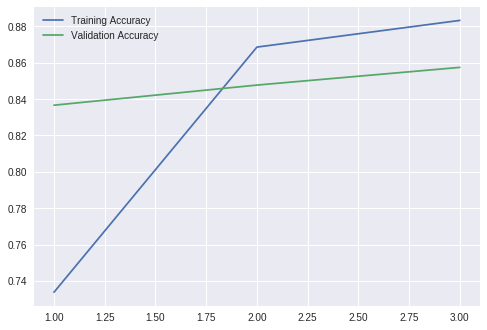

In [0]:
#Entire Program

#Import necessary libraries
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import backend as K
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

import os

#Suppress Warnings (Optional)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

#Set Variables
epochs = 3
batch_size = 64

#Load and separate data into X: Features, Y: Labels
top_words = 5000 #Loads top 5000 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train)

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

#Defining the model (Hyper-opt: hyperparameter optimization)
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Setting Early Stopping
my_callbacks = [EarlyStopping(monitor="acc", patience=5, mode=max)]

#Fitting & Evaluating
hist = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_split=0.3, 
                    callbacks=my_callbacks)

score = model.evaluate(X_test, y_test)

print("Testing Loss:", score[0])
print("Testing Accuracy:", score[1])

#Model Summary
model.summary()

#Plotting training accuracy & validation accuracy
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(("Training Accuracy", "Validation Accuracy"))
plt.show